In [11]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import scipy.stats as stats

We take all the columns from all the dataset, and we concatenate them. From the new dataframe obtained, we choose a  random sample of items. 

In [2]:
for i in range(6):
    df_month = pd.read_csv('yellow_tripdata_2018-0%s.csv' %(str(i+1)), sep=',', 
                     usecols=['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance'])
    try:
        df = pd.concat([df_month, df] , ignore_index=True)
    except:
        df = df_month
    del df_month
        
df = df.sample(1000)

In [3]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format="%Y/%m/%d %H:%M:%S")
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format="%Y/%m/%d %H:%M:%S")

df = df.loc[(df['tpep_pickup_datetime'].dt.year == 2018) & (df['tpep_dropoff_datetime'].dt.year == 2018) &
                (df['tpep_pickup_datetime'].dt.month == 1) & (df['tpep_dropoff_datetime'].dt.month == 1)]
df = df.loc[(df.trip_distance > 0.2)]

In [4]:
pickup_time = pd.to_datetime(df['tpep_pickup_datetime'], format = "%Y/%m/%d %H:%M:%S")
dropoff_time = pd.to_datetime(df['tpep_dropoff_datetime'], format = "%Y/%m/%d %H:%M:%S")
delta = (dropoff_time - pickup_time).astype('timedelta64[m]')
df['trip_duration'] = delta
df = df.loc[(df['trip_duration'] <= 300)]

In [5]:
df = df[['trip_duration','trip_distance']]

To visualize the linear relationships between the two datasets we use the function *seaborn.lmplot*.

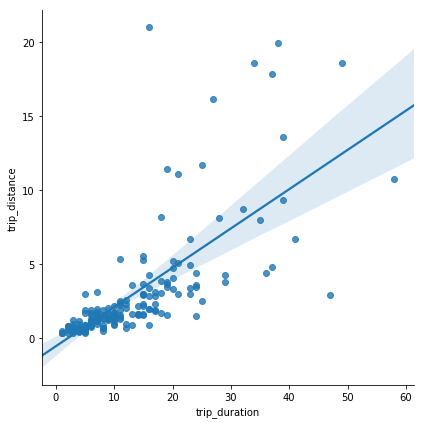

In [6]:
sns.lmplot(x= 'trip_duration', y='trip_distance', data= df, size=6) 

We also draw a plot of two variables *trip_duration* and *trip_distance* with bivariate and univariate graphs, using the function *seaborn.jointplot*.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


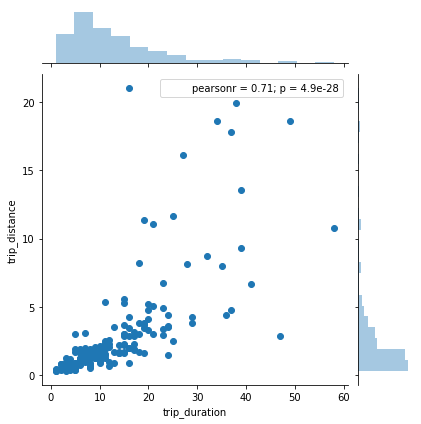

In [8]:
sns.jointplot(x='trip_duration', y='trip_distance', data= df)

The *Pearson coefficient* is a measure of the linear correlation between two datasets. It varies between $-1$ and $+1$, with $0$ implying there is not correlation. 
- If the coefficient is equal to $-1$ or $+1$ imply an exact linear relationship; 
- Positive correlations imply that as x increases, so does y; 
- Negative correlations imply that as x increases, y decreases. 

In [12]:
x=np.array(df['trip_distance'])
y=np.array(df['trip_duration'])

r, p = stats.pearsonr(x,y) # r: Pearson’s correlation coefficient, p = p-value
print('The Pearson\'s correlation coefficient is', r)

The Pearson's correlation coefficient is 0.7132399372029657


The correlation coefficient $r > 0$, then there is a positive correlation between the two datatsets, so they are not independent.